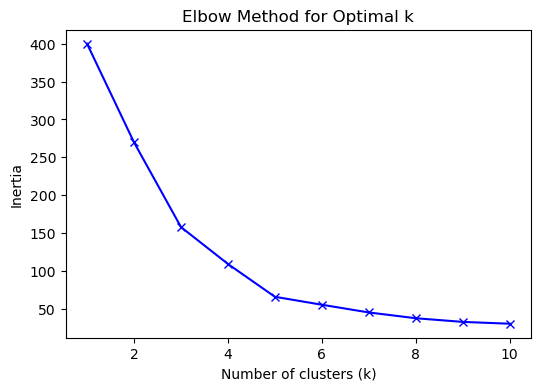

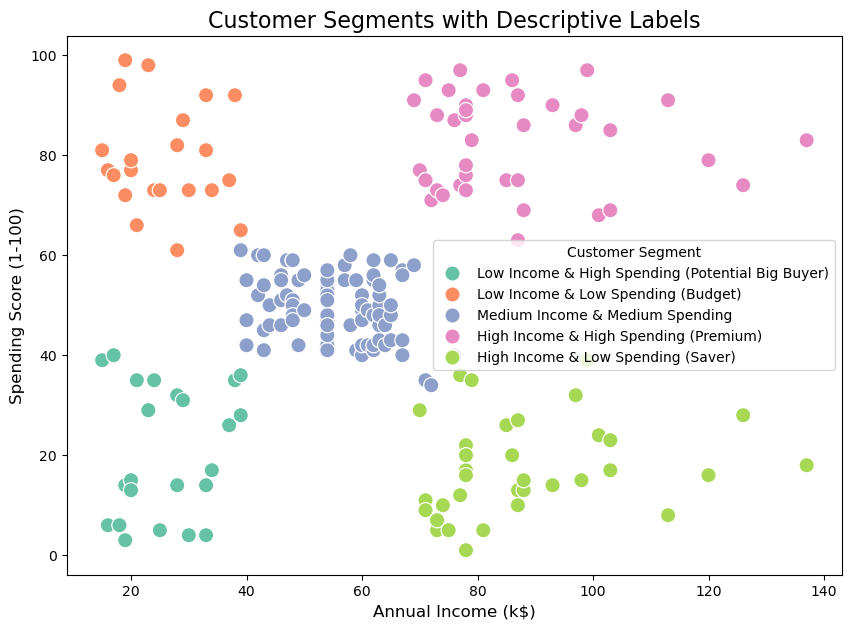


Average values per cluster:
                                                   Annual Income (k$)  \
Cluster_Label                                                          
High Income & High Spending (Premium)                          86.54   
High Income & Low Spending (Saver)                             88.20   
Low Income & High Spending (Potential Big Buyer)               26.30   
Low Income & Low Spending (Budget)                             25.73   
Medium Income & Medium Spending                                55.30   

                                                  Spending Score (1-100)  
Cluster_Label                                                             
High Income & High Spending (Premium)                              82.13  
High Income & Low Spending (Saver)                                 17.11  
Low Income & High Spending (Potential Big Buyer)                   20.91  
Low Income & Low Spending (Budget)                                 79.36  
Medium Income &

In [31]:
import warnings
warnings.filterwarnings("ignore") 

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans


file_path = r"C:\Users\prady\Downloads\archive (1)\Mall_Customers.csv"
df = pd.read_csv(file_path)


X = df[['Annual Income (k$)', 'Spending Score (1-100)']]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


inertia = []
K_range = range(1, 11)
for k in K_range:
    model = KMeans(n_clusters=k, random_state=42, n_init=10)
    model.fit(X_scaled)
    inertia.append(model.inertia_)

plt.figure(figsize=(6,4))
plt.plot(K_range, inertia, 'bx-')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()


kmeans = KMeans(n_clusters=5, random_state=42, n_init=10)
df['Cluster'] = kmeans.fit_predict(X_scaled)


cluster_labels = {
    0: 'Medium Income & Medium Spending',
    1: 'High Income & High Spending (Premium)',
    2: 'Low Income & Low Spending (Budget)',
    3: 'High Income & Low Spending (Saver)',
    4: 'Low Income & High Spending (Potential Big Buyer)'
}
df['Cluster_Label'] = df['Cluster'].map(cluster_labels)


plt.figure(figsize=(10,7))
sns.scatterplot(
    x='Annual Income (k$)',
    y='Spending Score (1-100)',
    hue='Cluster_Label',
    data=df,
    palette='Set2',
    s=120
)
plt.title('Customer Segments with Descriptive Labels', fontsize=16)
plt.xlabel('Annual Income (k$)', fontsize=12)
plt.ylabel('Spending Score (1-100)', fontsize=12)
plt.legend(title='Customer Segment')
plt.show()


cluster_stats = df.groupby('Cluster_Label')[['Annual Income (k$)', 'Spending Score (1-100)']].mean().round(2)
print("\nAverage values per cluster:\n", cluster_stats)


count_per_segment = df['Cluster_Label'].value_counts()
print("\nCustomer count per segment:\n", count_per_segment)
